In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/restaurant-dataset/Restaurant_data.csv")

# Display first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Shape and info
print("Shape:", df.shape)
df.info()

Shape: (9551, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Swi

In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
# Statistical summary
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
# Drop rows with missing target or too many missing features
df = df.dropna(subset=['Aggregate rating'])

In [7]:
# Convert Yes/No columns to 1/0
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
# Initialize label encoder
le = LabelEncoder()

# For each column, encode and show mapping in table form
for col in ['City', 'Locality', 'Cuisines', 'Currency', 'Rating color', 'Rating text']:
    df[col] = le.fit_transform(df[col].astype(str))

In [9]:
# Define features (drop irrelevant or ID columns)
X = df.drop(columns=[
    'Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose',
    'Longitude', 'Latitude', 'Aggregate rating'  # Drop target from features
])

# Target variable
y = df['Aggregate rating']

In [10]:
# Split into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Split into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)

# Predict
y_pred_lr = lr.predict(X_test_lr)

In [13]:
# Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_dt, y_train_dt)

# Predict
y_pred_dt = dt.predict(X_test_dt)

In [14]:
def evaluate_model(y_test, y_pred, model_name):
    mse = round(mean_squared_error(y_test, y_pred), 2)
    r2 = round(r2_score(y_test, y_pred), 2)
    print(f"\nModel: {model_name}")
    print("MSE:", mse)
    print("R2 Score:", r2)

In [15]:
# Linear Regression
evaluate_model(y_test_lr, y_pred_lr, "Linear Regression")


Model: Linear Regression
MSE: 1.27
R2 Score: 0.44


In [16]:
# Decision Tree
evaluate_model(y_test_dt, y_pred_dt, "Decision Tree Regressor")


Model: Decision Tree Regressor
MSE: 0.06
R2 Score: 0.97


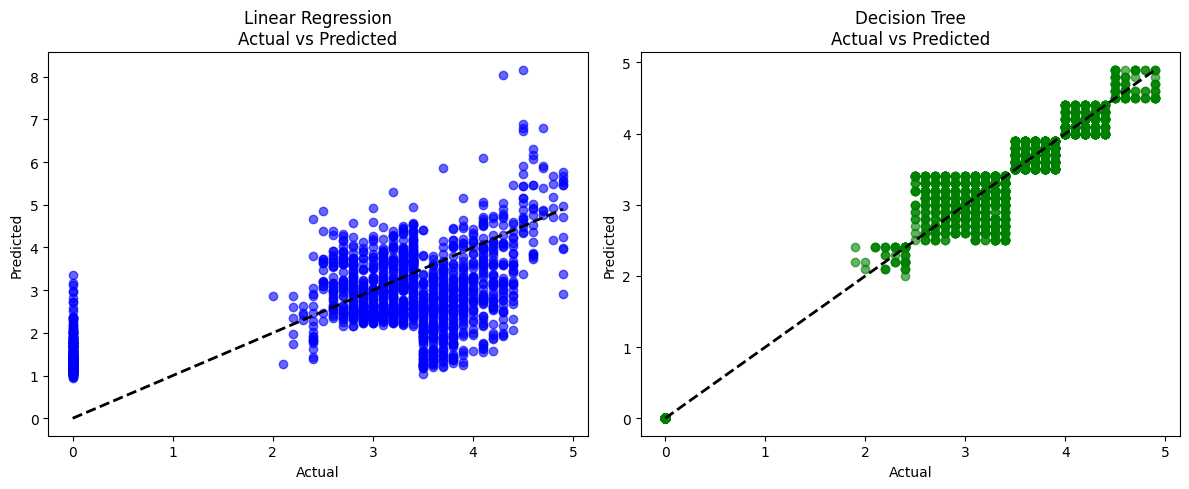

In [17]:
# Scatter plot: Actual vs Predicted for Linear Regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_lr, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression\nActual vs Predicted')

# Scatter plot: Actual vs Predicted for Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test_dt, y_pred_dt, color='green', alpha=0.6)
plt.plot([y_test_dt.min(), y_test_dt.max()], [y_test_dt.min(), y_test_dt.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree\nActual vs Predicted')

plt.tight_layout()
plt.show()